In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional
from noise_addition import GaussianTransformer, luminance_transform

In [2]:
original_image = cv2.imread("data/playground/img1.jpg")

In [3]:
def imshow_images(
    input_image: np.ndarray, transformed_image: np.ndarray, title: Optional[str] = None
):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].imshow(input_image[..., ::-1])
    ax[1].imshow(transformed_image[..., ::-1])
    ax[0].axis("off")
    ax[1].axis("off")
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Gaussian Transformer

In [4]:
psnr_noise = [10, 20, 30, 40, 50]

In [5]:
gaussian_transformer = GaussianTransformer()

PSNR == 10
PSNR == 11.0 is in range 10, 20
generated PSNR: 11.241312966826003


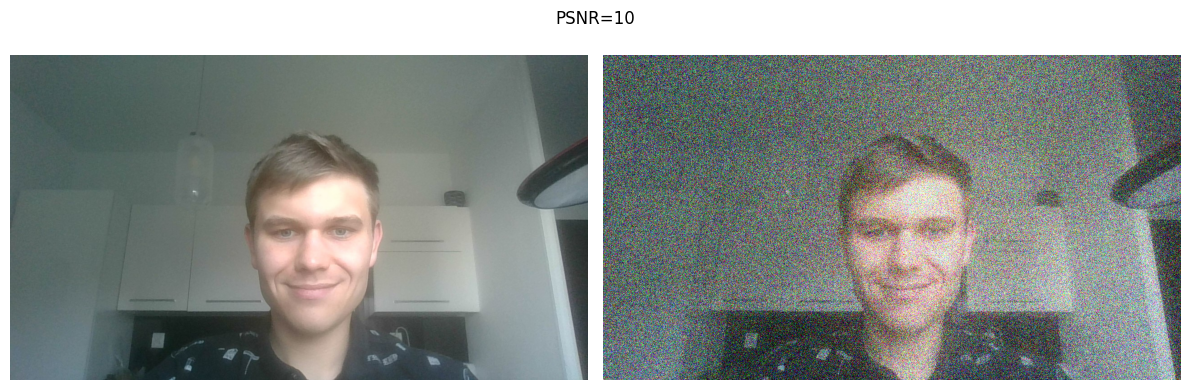

PSNR == 20
PSNR == 20.0 is in range 20, 30
generated PSNR: 20.066572282929197


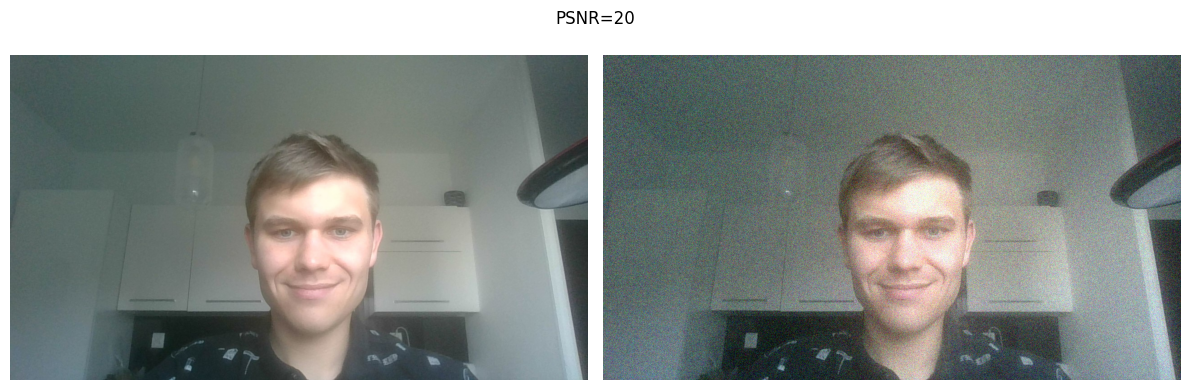

PSNR == 30
PSNR == 30.0 is in range 30, 40
generated PSNR: 29.997391964671046


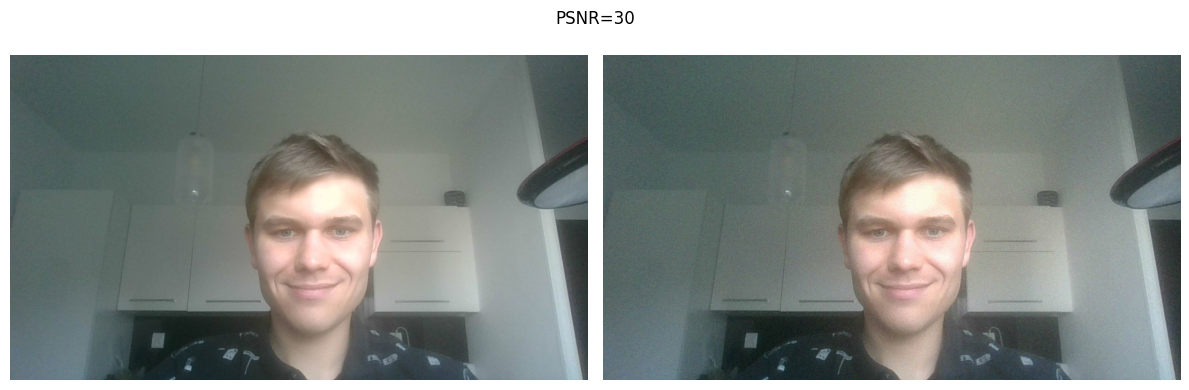

PSNR == 40
PSNR == 40.0 is in range 40, 50
generated PSNR: 39.79302020700771


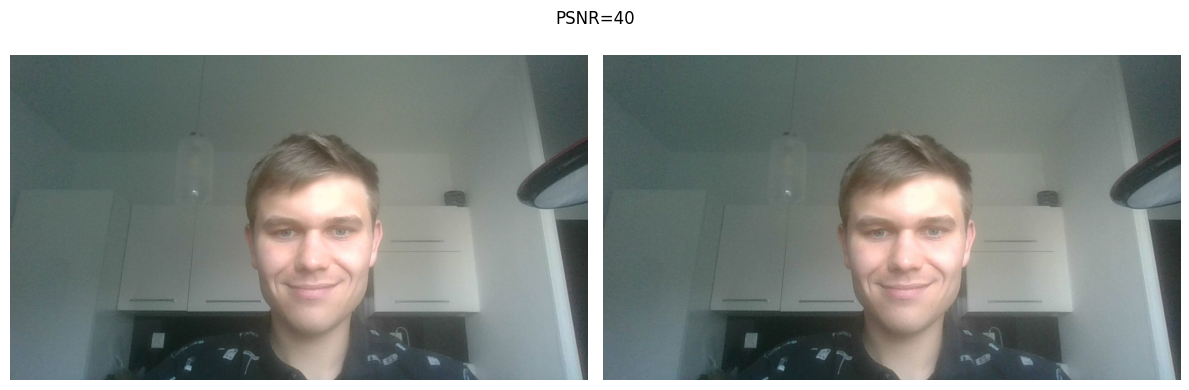

PSNR == 50
Could not generate noise in range for PSNR=50, generated PSNR=48.20583158948868
generated PSNR: 48.20583158948868


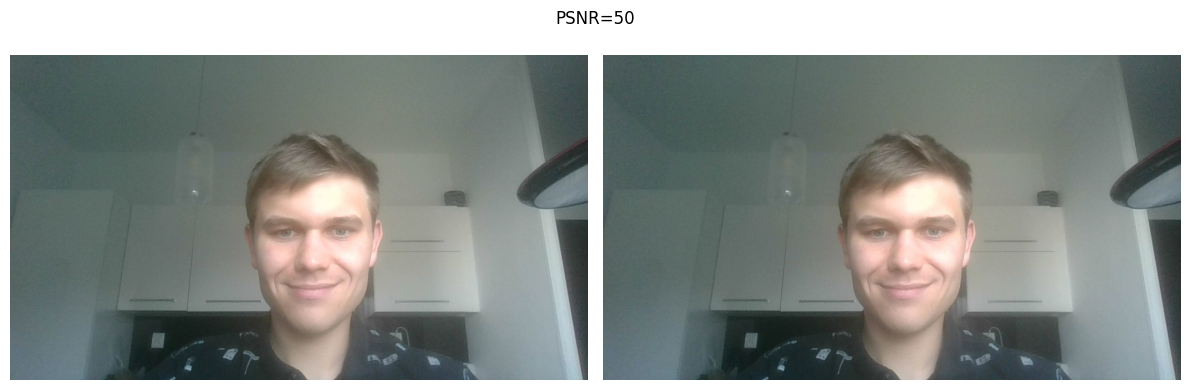

In [6]:
for PSNR_value in psnr_noise:
    print(f"PSNR == {PSNR_value}")
    img_noise = gaussian_transformer.transform(original_image, PSNR_value)
    print(f"generated PSNR: {cv2.PSNR(original_image, img_noise)}")
    imshow_images(original_image, img_noise, title=f"PSNR={PSNR_value}")

# LUM transformation

In [7]:
lum_transformations = {
    "quadratic": [None],
    "linear": [0.5, 0.6, 0.75, 4 / 3, 1.5],
    "constant": [-100, -20, -10, 30],
}

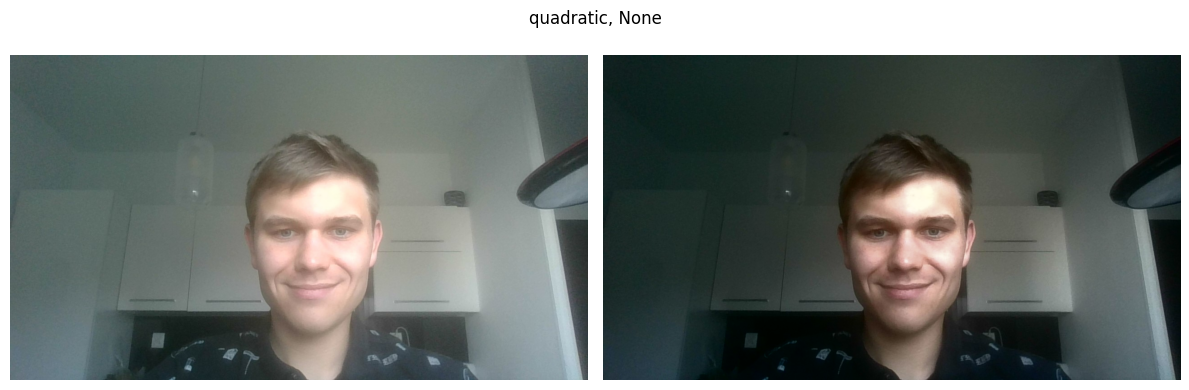

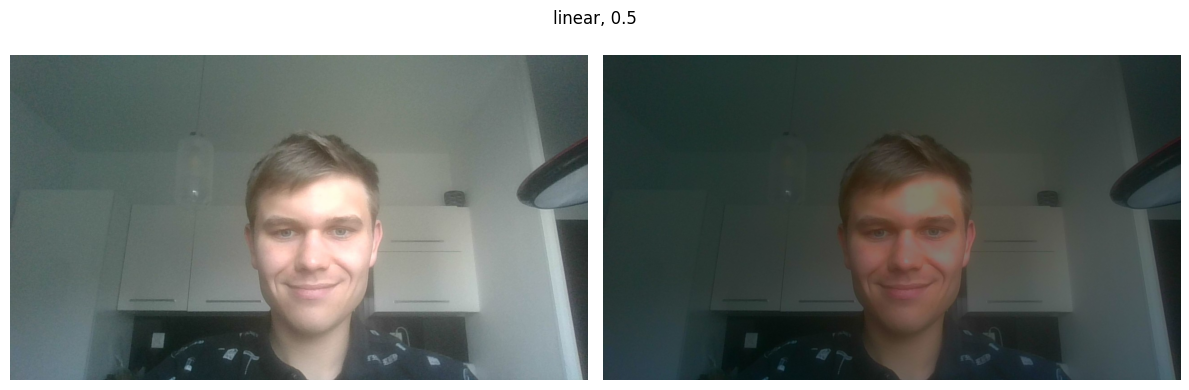

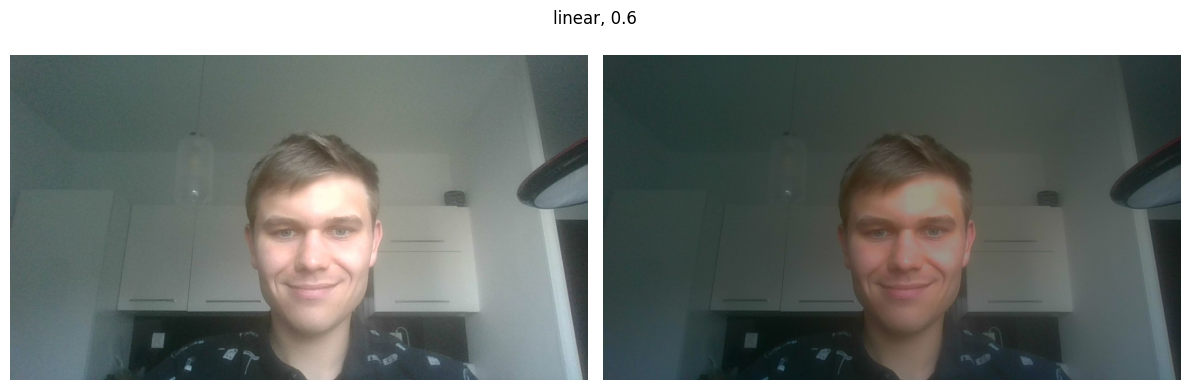

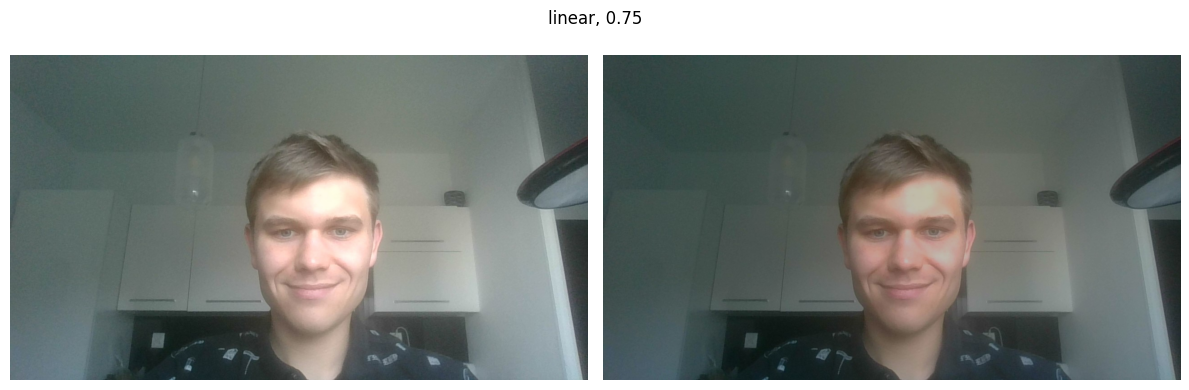

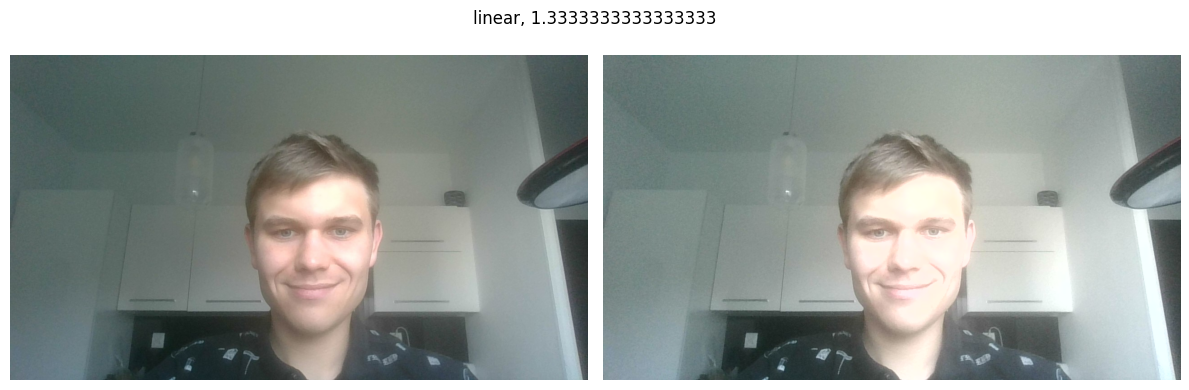

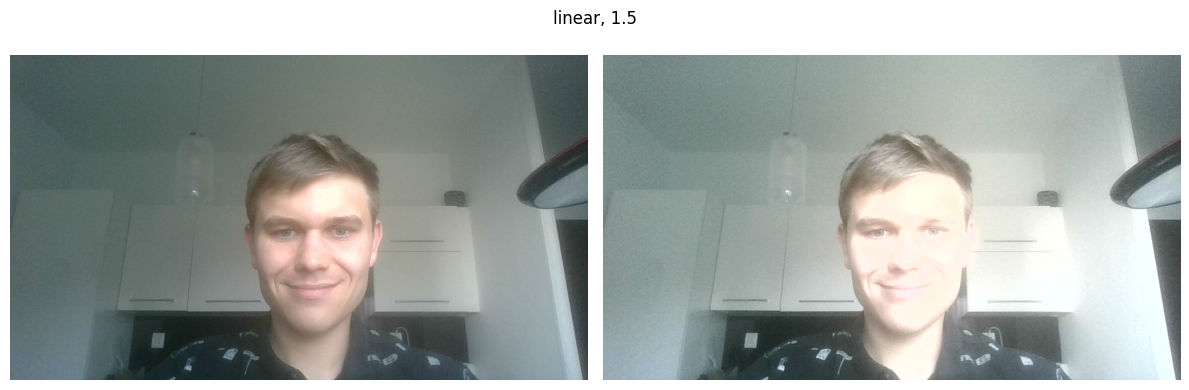

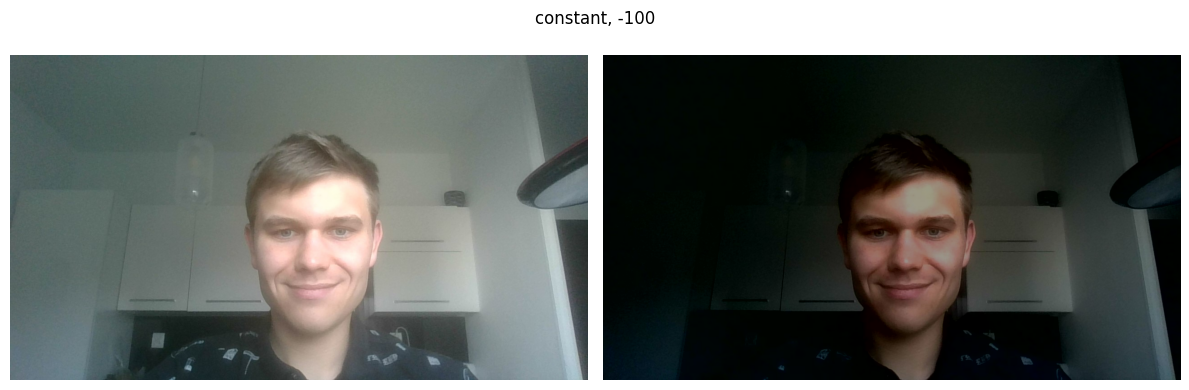

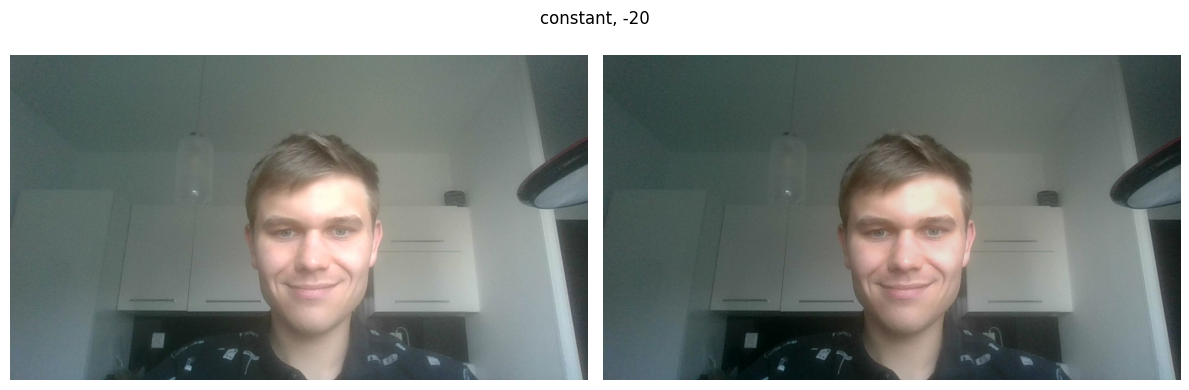

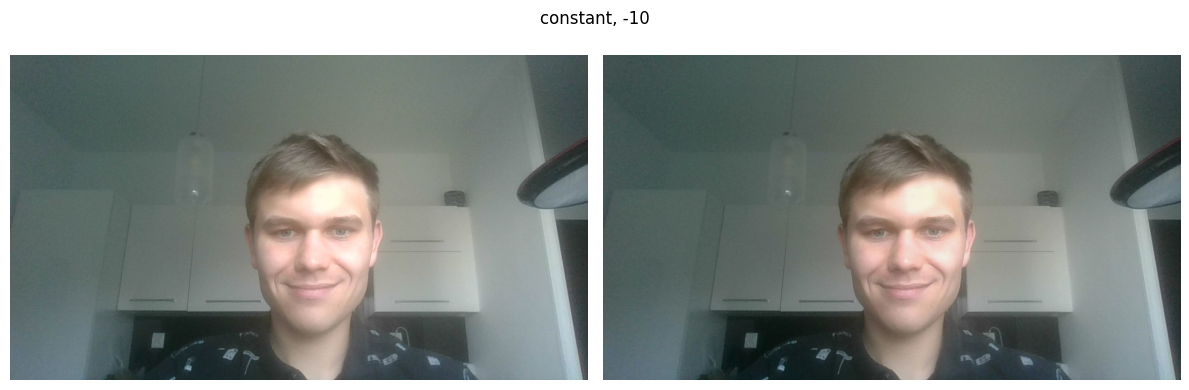

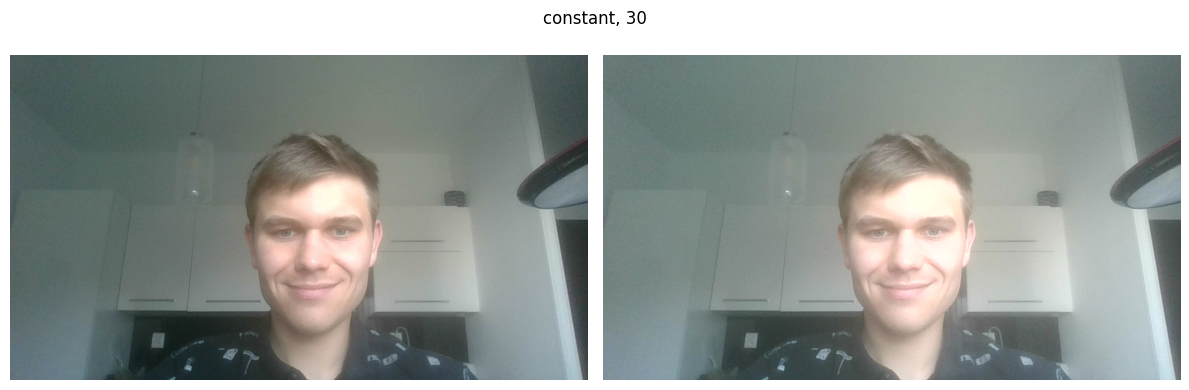

In [8]:
for key, values in lum_transformations.items():
    for scale_factor in values:
        lum_img = luminance_transform(
            input_image=original_image, scaling_type=key, scale_factor=scale_factor
        )
        imshow_images(original_image, lum_img, title=f"{key}, {scale_factor}")